# Group 18 - Problem Set 2

### Imports

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data and configuring options

In [4]:
# Load the data into pandas DataFrame
os.chdir("C:\\Users\\ralph\\Desktop\\ECONOMICS (MA)\\Year 4\\SEM2 Programming for Economics\\Problem Sets\\PS2")
df = pd.read_excel("./UNPS_1112_PS2.xls")

# Change DataFrame formats for future use
pd.options.display.precision = 3

# Exercise 1

### Part a

In [5]:
#Test for duplicates in the "hhid" variable
duplicates = df[df.duplicated(subset="hhid", keep=False)]

# Print the number of duplicates in the "hhid" values
print("Number of duplicate obs. in HHID values:", duplicates.shape[0]) 

# Print the number of obs in data set.
print("Total number of observations:", df.shape[0])

Number of duplicate obs. in HHID values: 0
Total number of observations: 2613


### Part b

In [6]:
# Calculate descriptive statistics and if there are any missing observations
descriptives=df[["head_gender","head_age", "familysize", "consumption","income", "wealth"]].describe()
descriptives
# 16 missing obs for gender, age, family size. Most household heads are male, given by the gender mean.
# There may be outliers in wealth, income and consumption. The maximum values are considerably higher than even the 75th percentiles.

,head_gender,head_age,familysize,consumption,income,wealth
count,2597.000,2597.000,2597.000,2613.000,2613.000,2613.000
mean,1.314,46.068,7.481,1803.793,1860.076,4912.698
std,0.464,15.069,3.713,1308.743,2607.518,8359.886
min,1.000,14.000,1.000,250.306,27.487,0.000
25%,1.000,34.000,5.000,918.325,471.204,720.020
50%,1.000,44.000,7.000,1426.615,1061.194,2108.598
75%,2.000,56.000,9.000,2296.860,2234.801,5221.940
max,2.000,100.000,33.000,8369.898,52137.737,76396.340


In [7]:
# Formally checking for outliers 
outlier=[]
for var in ("head_gender","head_age", "wealth", "familysize", "consumption","income"):
    outlier_var = var+"_outlier"
    var_name=[outlier_var]
    outlier = pd.DataFrame(columns=var_name)
    
    q1, q3 = np.percentile(df[var], [25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5 * iqr)
    upper_bound=q3+(1.5 * iqr)
    
    outlier = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    
    print("there are ", outlier[var].count(), "outliers in ", var)

there are  0 outliers in  head_gender
there are  0 outliers in  head_age
there are  257 outliers in  wealth
there are  0 outliers in  familysize
there are  135 outliers in  consumption
there are  195 outliers in  income


### Part c 

In [8]:
# Create dummy DataFrame
dummies=pd.get_dummies(df["head_gender"], prefix="gender", dummy_na=True)


# dummies.mean()
# Rename Columns
dummies = dummies.rename(columns = {"gender_1.0" : "male", "gender_2.0" : "female"})

# Drop rows that contain NaN values
dummies = dummies.drop(dummies.loc[dummies.gender_nan == 1].index)

# Remove Gender_nan column
dummies = dummies.drop("gender_nan", axis=1)

dummies.loc[dummies.female == np.nan]
# dummies.mean()

# Display proportions
print(f"Percentage of head_gender that are male: {100*dummies.mean()['male']:.4} %")
print(f"Percentage of head_gender that are female: {100*dummies.mean()['female']:.4} %")

Percentage of head_gender that are male: 68.58 %
Percentage of head_gender that are female: 31.42 %


### Part d

In [10]:
df[['consumption', 'familysize', 'head_age', 'head_gender']].groupby(by="head_gender").mean()

,consumption,familysize,head_age
head_gender,,,
1.0,1898.304,7.721,44.389
2.0,1593.261,6.956,49.734


- We observe noticeable differences across two groups for all three of the variables. More specifically, when the head of the family is male, the consumption and familysize variables are bigger than of avg values for female heads of households, while the age of the household head is younger for male heads when compared to female heads of households.
- Male headed households have higher consumption( 1989 vs 1593) , larger families (7.72 vs 6.95) but tend to be younger (mean age 44.38 vs 59.73
- Differences in age may be explained by women living longer then men

# Exercise 2

### Part a

C:\Users\ralph\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


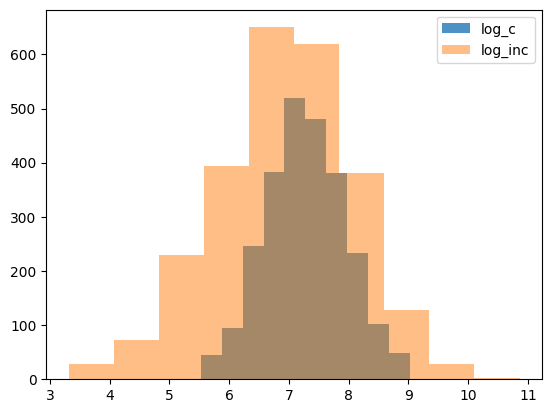

In [26]:
df['log_c'] = np.log(df['consumption'])
df['log_inc'] = np.log(df['income'])
df['log_w'] = np.log(df['wealth'])

# Some log_w values = -inf since there were some wage = 0 observations
# To avoid any errors in the following distribution, we change the -inf values back to 0:
df["log_w"].replace([-np.Inf], 0, inplace=True)

# Plot distribution
plt.hist(df["log_c"], alpha=0.8, label="log_c")
plt.hist(df["log_inc"], alpha=0.5, label="log_inc")
plt.legend()
plt.show()

#### Do the distributions resemble some known distribution?
- Log consumption is roughly a symmetric bell-shaped distribution. The distribution could be be normally distributed.
- Log income is slightly left skewed, but is otherwise a similar shaped distribution. Log income could also be normally distributed.

#### Is inequality higher in consumption or in income?
Based on the distributions, we can argue that inequality is higher in income.

### Part b

In [12]:
# Creating variables
var_log_c = round(float(df[["log_c"]].var()), 4)
var_log_inc = round(float(df[["log_inc"]].var()), 4)
var_log_w = round(float(df[["log_w"]].var()), 4)

# Create dict to pass into new DataFrame 
variance_logs = {
        "Variance of log of:" : ["Consumption", "Income", "Wages"],\
        "Uganda" : [var_log_c, var_log_inc, var_log_w],\
        "USA" : [0.79, 0.97, 2.11]}
        
# Create DataFrame
df_var_log = pd.DataFrame(variance_logs).set_index("Variance of log of:")

df_var_log

,Uganda,USA
Variance of log of:,,
Consumption,0.450,0.79
Income,1.339,0.97
Wages,2.976,2.11


Uganda has quite a low variance in log consumption compared to the USA, but a much higher variance in both log income and log wealth.
Larger variances in logs imply higher inequality, so whether Uganda has more inequality than the USA depends on which specfic variables we decide to look at.

### Part c

In [13]:
# Group the data by the urban variable
grouped = df.groupby("urban")

# Calculate the avg of of consumption, income, and wealth variables for rural and urban areas separately
avg_c = grouped["consumption"].mean()
avg_inc = grouped["income"].mean()
avg_w = grouped["wealth"].mean()

# Create DataFrame
df_avg_urban = pd.concat([avg_c, avg_inc, avg_w], axis=1)

# Format DataFrame
styles = [dict(selector="caption",
                       props=[("font-size", "120%"),
                              ("color", 'black')])]

# Display DataFrame
df_avg_urban.style.set_caption("Average Values:").set_table_styles(styles)

,consumption,income,wealth
urban,,,
0,1629.450928,1713.962054,4520.995235
1,2544.220036,2480.619091,6576.255691


#### Are the differences between the two areas large?
Yes, there is a considerably large difference in all three metrics between rural and urban areas. Urban areas see significantly higher levels of consumption, income, and wealth.

### Part d

In [14]:
# Calculate the variance of the log of consumption, income, and wealth variables for rural and urban areas separately
var_log_c = grouped["log_c"].var()
var_log_inc = grouped["log_inc"].var()
var_log_w = grouped["log_w"].var()

# Create DataFrame
df_var_log_urban = pd.concat([var_log_c, var_log_inc, var_log_w], axis=1)

# Format DataFrame
styles = [dict(selector="caption",
                       props=[("font-size", "120%"),
                              ("color", 'black')])]

# Display DataFrame
df_var_log_urban.style.set_caption("Variances:").set_table_styles(styles)

,log_c,log_inc,log_w
urban,,,
0,0.413955,1.342474,2.518233
1,0.439342,1.107938,4.881224


- The difference between the variance of consumption for rural and suburban areas is small, with a 0.02 difference.
- The difference between the variance of income for rural and urban is larger than the difference in var of consumption. It can be said that the 0.2 point difference is significant.
- The difference between the variance of wealth for rural and urban is significantly larger than both var of consumption and var of income. It can be said that the 2 point difference demonstrates a significant level of inequality.

### Part e

In [15]:
def gini(array):
    array = np.array(array)
    array = array.flatten() 
    if np.amin(array) < 0:
        array += np.amin(array)
    array += 0.0000001 
    array = np.sort(array) 
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

# Create dict of values to pass into new DataFrame
ginis = {
    "Uganda" : [gini(df["consumption"]), gini(df["income"]),\
     gini(df["wealth"])],
    "USA" : [0.41, 0.44, 0.79],
    "" : ["consumption", "income", "wealth"]
     }

# Create DataFrame
df_gini = pd.DataFrame(ginis).set_index("")

# Format DataFrame
styles = [dict(selector="caption",
                       props=[("font-size", "120%"),
                              ("color", 'black')])]

# Display DataFrame
df_gini.style.set_caption("Gini Coefficients:").set_table_styles(styles)

,Uganda,USA
,,
consumption,0.365717,0.410000
income,0.555572,0.440000
wealth,0.656828,0.790000


- In the paper, the gini coefficient in consumption in U.S. is .41, so the var of gini coefficient in Uganda is lower (.365)
- In the paper, the gini coefficient in income in U.S. is .44, so the gini coefficient in Uganda is higher (.55)
- In the paper, the gini coefficient in U.S. is .79, so the gini coefficient in Uganda is smaller (.656)

### Part f

In [16]:
#Calculate share of the bottom 50%, i.e wealth of the 50 poorest percent 

#50th percentile 
#Create a variable which stores the 50th percentile of wealth 
percentile50=np.percentile(df["wealth"], 50)
#Create an empty dummy variable 
df["below_50th"]= 0
#If wealth is below the 50th percentile, assign value of wealth to dummy previously created 
df.loc[df["wealth"]<percentile50, "below_50th"]=df["wealth"]
#Calculate the wealth held by the bottom 50% as share of total wealth 
below_50=df["below_50th"].sum()/df["wealth"].sum()
print(f"Bottom 50 percent hold {below_50:.4} share of total wealth.")
#Bottom 50% of the population hold 8% of the total wealth

#top10th percentile
#Follow same procedure as for 50th percentile but with the 90th percentile 
percentile90=np.percentile(df["wealth"], 90)
df["top_10"]= 0
df.loc[df["wealth"]>percentile90, "top_10"]=df["wealth"]
top_10=df["top_10"].sum()/df["wealth"].sum()
print(f"Top 10 percent hold {top_10:.4} share of total wealth.")
#Top 10% of the population hold 51% of the total wealth

#Top 5th percentile
#follow same procedure as for 50th percentile but with the 95th percentile 
percentile95=np.percentile(df["wealth"], 95)
df["top_05"]= 0
df.loc[df["wealth"]>percentile95, "top_05"]=df["wealth"]
top_05=df["top_05"].sum()/df["wealth"].sum()
print(f"Top 5 percent hold {top_05:.4} share of total wealth.")
#Top 5% hold 35% of all wealth

#top1st percentile
#follow same procedure as for 99th percentile but with the 95th percentile 
percentile99=np.percentile(df["wealth"], 99)
df["top_01"]= 0
df.loc[df["wealth"]>percentile99, "top_01"]=df["wealth"]
top_01=df["top_01"].sum()/df["wealth"].sum()
print(f"Top 1 percent hold {top_01:.4} share of total wealth.")
#top 1% holds 11.9% of all wealth

Bottom 50 percent hold 0.08211 share of total wealth.
Top 10 percent hold 0.5111 share of total wealth.
Top 5 percent hold 0.3525 share of total wealth.
Top 1 percent hold 0.1191 share of total wealth.


### Part g

Inequality is very large in Uganda, as the top 5% of the population holds 35% of the total wealth in the country, while the bottom 50% only holds about 8% of the wealth. Furthermore, the top 10% of the population in Uganda hold more than half of the total wealth in the country.

Yes, we should be concerned about inequality in low-income countries such as Uganda. More specifically, as high levels of inequality allows greater economic instability in a country, the resources and opportunities (such as education, health system, wealth accumulation) get to be distributed inequally between different income groups in a country.

Moreover, high inequality will deprive low-income groups from improving their economic and social wellbeing, which could further escalate poverty and crime.

### Part h

Alvaredo & Gasparini argue in their 2005 paper that it's more common to use consumption as a metric for inequality in developing countries. They do not provide a specific coefficient for Uganda, so we use the mean coefficient in Subsaharan Africa (SSA) for comparison.

The SSA mean gini coefficient = 0.444 vs our 0.366. This suggests that they are overestimating income inequality if we regard our data as accurate. However, we cannot draw conclusions using an average coefficient as the coefficients have a large range between 33.3 and 63.1.

# Exercise 3

### Creating bins

In [17]:
# Drop extreme values (too few observations to get means within age)
df = df[df['head_age'] < 80]
df = df[df['head_age'] >18]

#To smooth the lines, group the ages in bins
bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
df['age_bins'] = pd.cut(df['head_age'],bins=bins, labels=labels)

### Part a

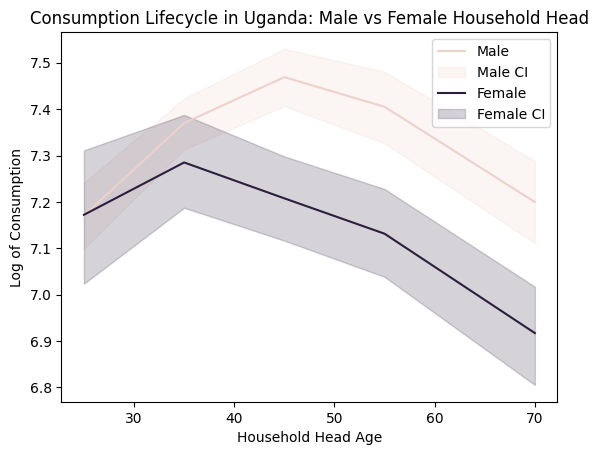

In [18]:
fig, ax = plt.subplots()

fig1 = sns.lineplot(x ="age_bins", y = "log_c", hue = "head_gender", data = df)
plt.title('Consumption Lifecycle in Uganda: Male vs Female Household Head')
plt.ylabel('Log of Consumption')
plt.xlabel('Household Head Age')

plt.legend(labels=["Male", "Male CI", "Female", "Female CI"])
plt.show()

### Part b

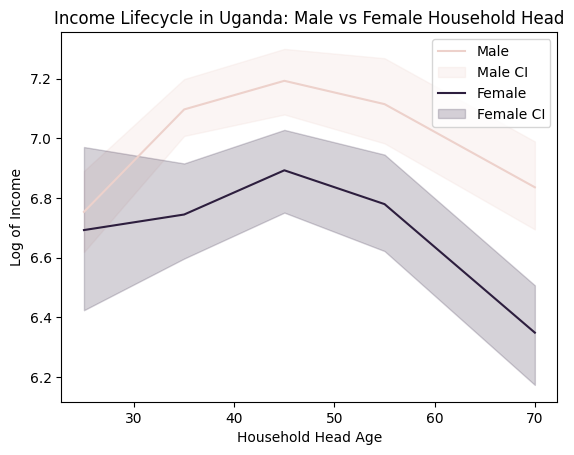

In [19]:
fig, ax = plt.subplots()
fig1 = sns.lineplot(x ="age_bins", y = "log_inc", hue = "head_gender", data = df);
plt.title('Income Lifecycle in Uganda: Male vs Female Household Head')
plt.ylabel('Log of Income')
plt.xlabel('Household Head Age')
plt.legend(labels=["Male", "Male CI", "Female", "Female CI"])

plt.show()
#Log of income over the lifecycle is almost always lower when the household head is a female 

### Part c

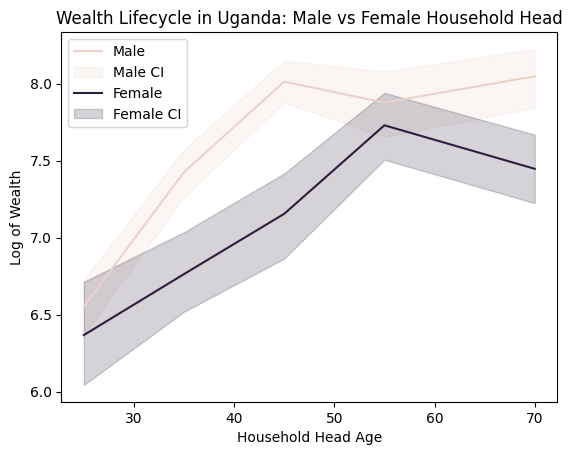

In [20]:
fig, ax = plt.subplots()
fig1 = sns.lineplot(x ="age_bins", y = "log_w", hue = "head_gender", data = df);
plt.title('Wealth Lifecycle in Uganda: Male vs Female Household Head')
plt.ylabel('Log of Wealth')
plt.xlabel('Household Head Age')
plt.legend(labels=["Male", "Male CI", "Female", "Female CI"])

plt.show()

### Part d

#### Consumption
- Log of consumption of households is largely similar for both genders at relatively younger ages (age<35)
- For older households, female-headed households have lower consumption. Female head consumption starts to fall off at a much earlier age than it does for male heads. This may be due to disparities in income, as shown in the subsequent graphs.

#### Income
- Log of income is generally higher for male heads, but are somewhat similar when heads are younger (<30).
- Incomes fall off at later ages as heads become older and stop working.

#### Wage
- Log of wealth is higher for households with a male head. The differences of which are highest between ages of 35 to 50 years old.
- Log of wealth is positively correlated with age